In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA

In [20]:
df = pd.read_csv('wine.csv')
df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,bad
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,bad
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,bad
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,good
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,bad
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,bad
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,good
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,good
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,bad


In [21]:
encoder = preprocessing.LabelEncoder()

df['quality'] = encoder.fit_transform(df['quality'])
fueltype = {index : label for index, label in enumerate(encoder.classes_)}
df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


In [22]:
df.isnull().values.any()

False

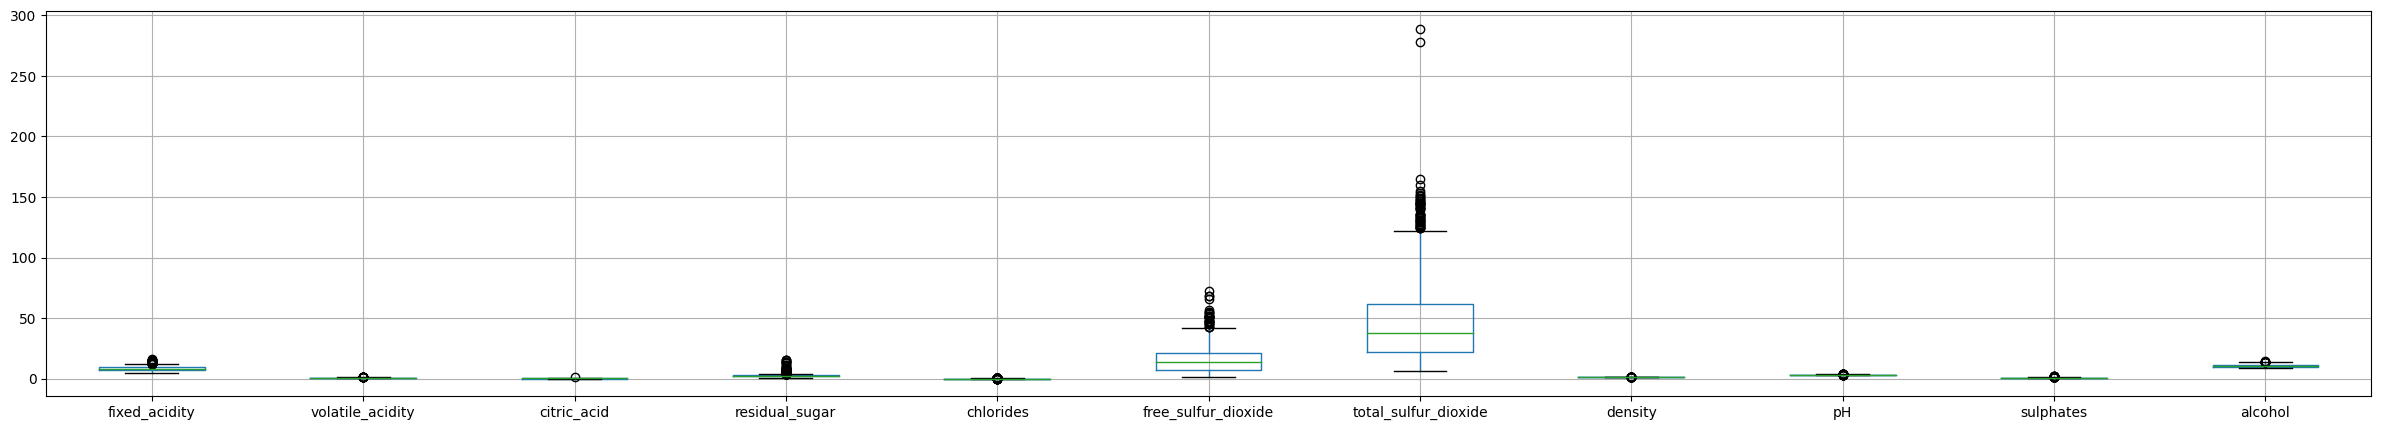

In [23]:
plt.figure(figsize=(30,5))
df.drop(['quality'], axis=1).boxplot()
print()

In [24]:
def outliers(df, column):
    temp = df[column]
    q1 = temp.quantile(0.25)
    q3 = temp.quantile(0.75)
    irq = q3 - q1
    outliers_min = q1 - (1.5 * irq)
    outliers_max = q3 + (1.5 * irq)

    df = df[df[column] >= outliers_min]
    df = df[df[column] <= outliers_max]
    return df

In [25]:
df = outliers(df, 'fixed_acidity')
df = outliers(df, 'volatile_acidity')
df = outliers(df, 'citric_acid')
df = outliers(df, 'residual_sugar')
df = outliers(df, 'chlorides')
df = outliers(df, 'free_sulfur_dioxide')
df = outliers(df, 'total_sulfur_dioxide')
df = outliers(df, 'density')
df = outliers(df, 'pH')
df = outliers(df, 'sulphates')
df = outliers(df, 'alcohol')

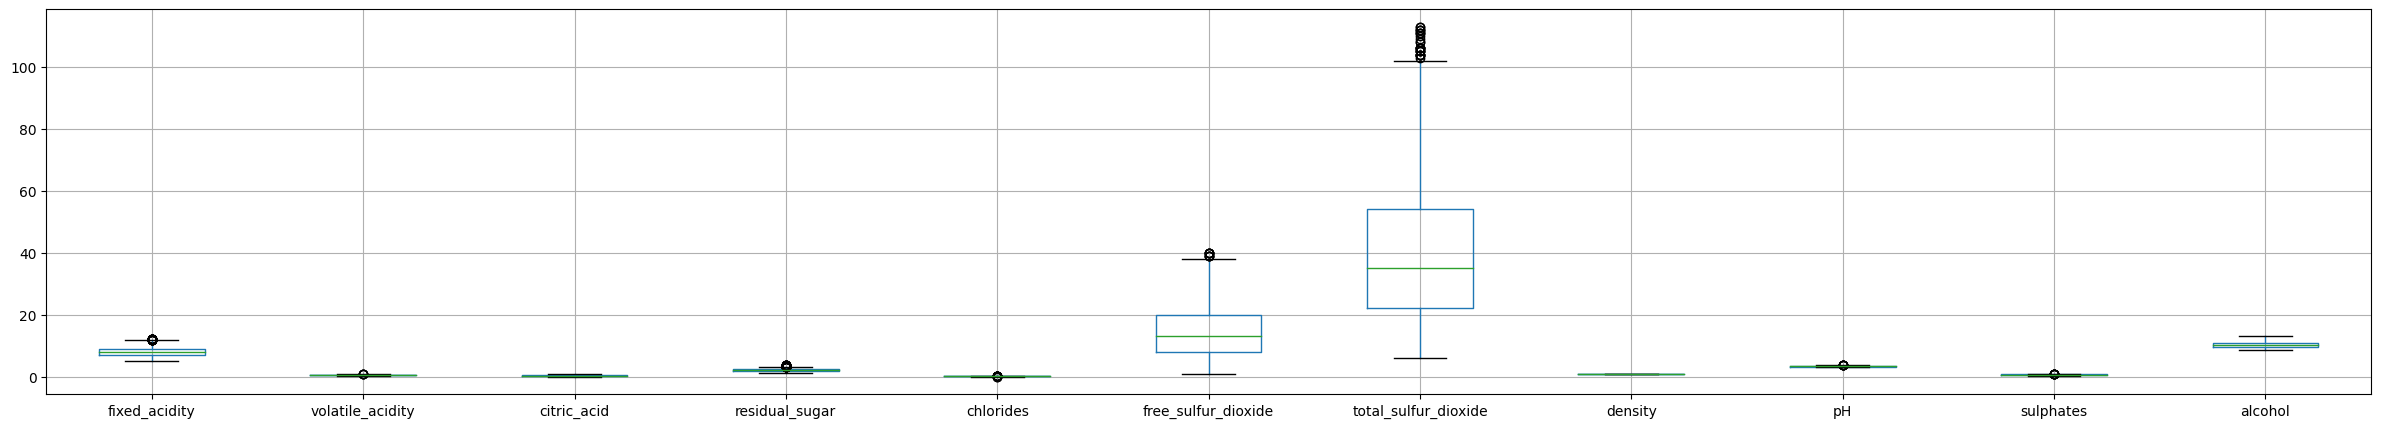

In [26]:
plt.figure(figsize=(30,5))
df.drop(['quality'], axis=1).boxplot()
print()

In [27]:
df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


<AxesSubplot:>

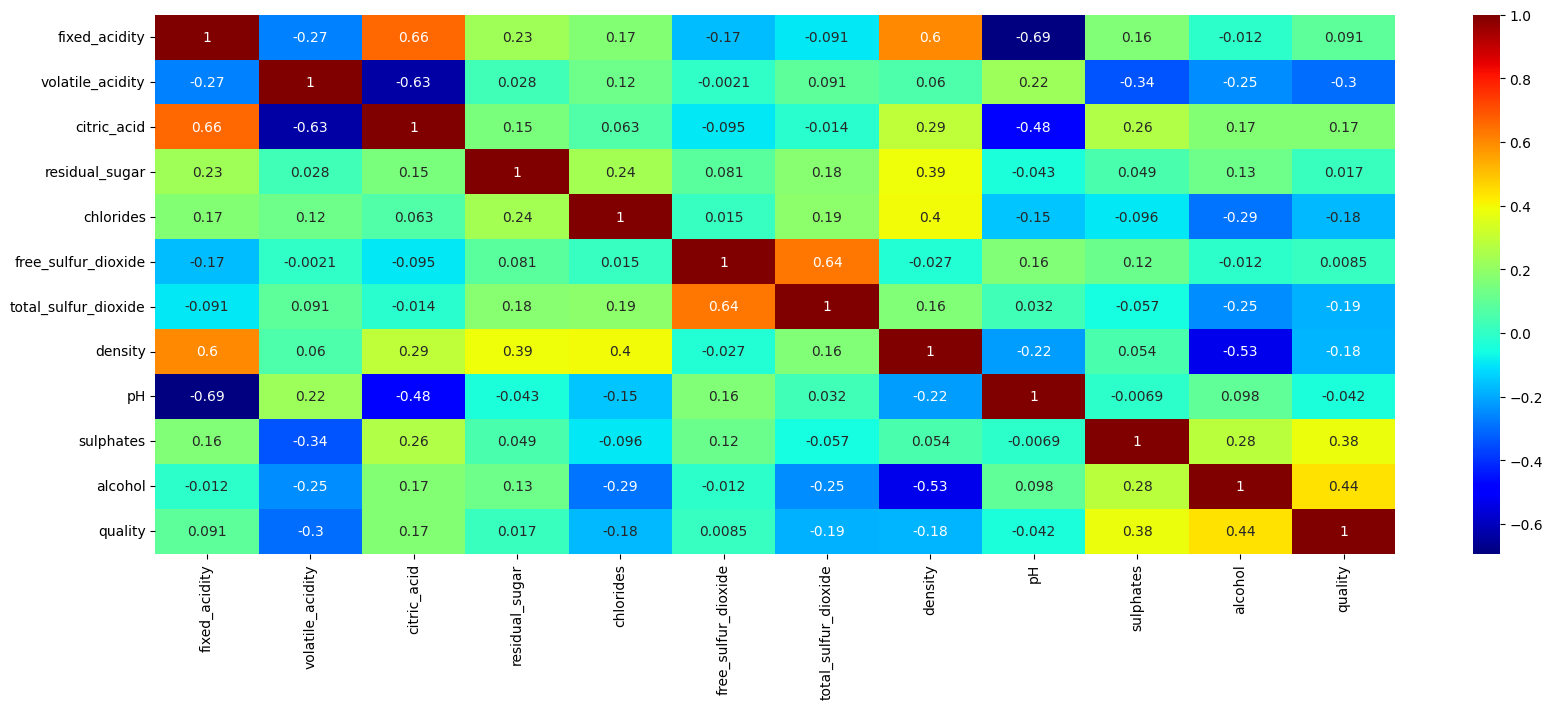

In [28]:
plt.figure(figsize=(20,7))
cor = df.corr()
sns.heatmap(cor, annot = True, cmap='jet')

In [29]:
Y = df['quality']
X = df[['fixed_acidity', 'volatile_acidity', 'residual_sugar', 'sulphates', 'pH', 'alcohol']]

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=1)
print(X_train.shape) 
print(X_test.shape)
Y_test = np.array(Y_test)

(851, 6)
(284, 6)


In [31]:
mlp = MLPClassifier(hidden_layer_sizes=(6, 6, 6), activation='relu', max_iter = 1500)
mlp.fit(X_train,Y_train)

predicted = mlp.predict(X_test)

c = []
for j in range(len(Y_test)):
    b = Y_test[j] - predicted[j]
    if b != 0:
        c.append(b)
err_y = len(c)/len(Y_test)
print('abs err:', err_y)

abs err: 0.24647887323943662


In [32]:
print('accuracy:', accuracy_score(Y_test, predicted))

accuracy: 0.7535211267605634


In [33]:
df0 = pd.DataFrame({'Atual': Y_test, 'Predicted': predicted})
df0

,Atual,Predicted
0,1,0
1,1,1
2,0,0
3,0,0
4,0,0
...,...,...
279,0,1
280,1,1
281,0,0
282,0,1


In [36]:
confusion_matrix(Y_test, predicted)

array([[ 95,  34],
       [ 36, 119]], dtype=int64)

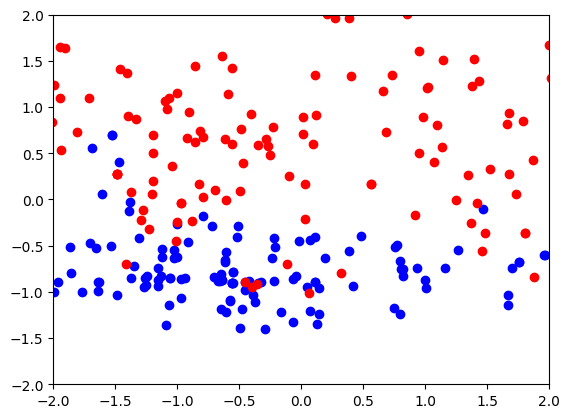

In [34]:
pca = PCA(n_components=2)
x_test_new = pca.fit_transform(X_test)

plt.plot(x_test_new[predicted == 0,0], x_test_new[predicted == 0,1], 'bo')
plt.plot(x_test_new[predicted == 1,0], x_test_new[predicted == 1,1], 'ro')
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.show()

C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


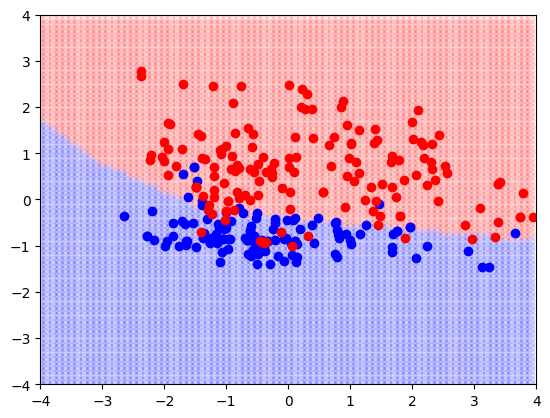

In [39]:
x_background = []

i = -4
while i <= 4:
  j = -4
  while j <= 4:
    x_background.append([i,j])
    j = j + 0.1
  i = i + 0.1
x_back = np.array(x_background)

x_background_transform = pca.inverse_transform(x_back)
y_background = mlp.predict(x_background_transform)

plt.plot(x_back[y_background == 0,0], x_back[y_background == 0,1], 'bo', alpha = 0.1)
plt.plot(x_back[y_background == 1,0], x_back[y_background == 1,1], 'ro', alpha =0.1)

plt.plot(x_test_new[predicted == 0,0], x_test_new[predicted == 0,1], 'bo')
plt.plot(x_test_new[predicted == 1,0], x_test_new[predicted == 1,1], 'ro')
plt.xlim([-4, 4])
plt.ylim([-4, 4])
plt.show()